# Introduction to Regression with Statsmodels

### Visualizing Data and Fitting a Regression Line

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [70]:
taiwan_real_estate = pd.read_csv('Data/taiwan_real_estate2.csv')
taiwan_real_estate.head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847


In [37]:
taiwan_real_estate.corr(numeric_only=True, method='pearson')

,dist_to_mrt_m,n_convenience,price_twd_msq
dist_to_mrt_m,1.000000,-0.602519,-0.673613
n_convenience,-0.602519,1.000000,0.571005
price_twd_msq,-0.673613,0.571005,1.000000


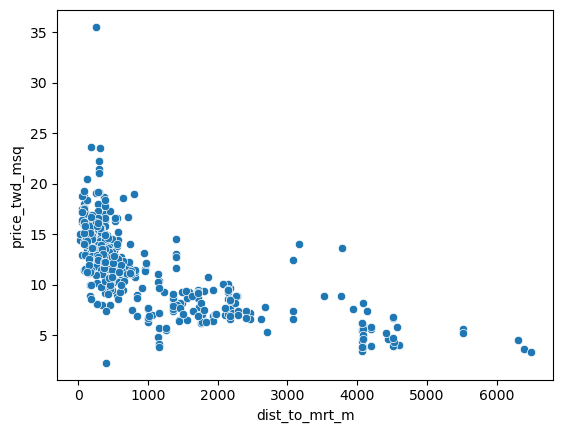

In [38]:
sns.scatterplot(x='dist_to_mrt_m', y='price_twd_msq', data=taiwan_real_estate)
plt.show()

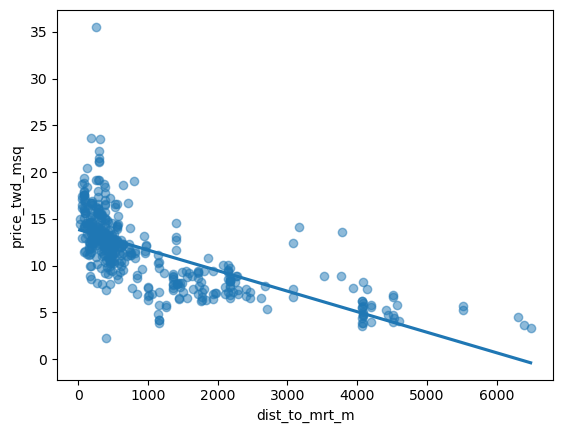

In [39]:
# regplot() fits a regression line onto the plot
sns.regplot(
    x='dist_to_mrt_m',
    y='price_twd_msq',
    ci=None,
    data=taiwan_real_estate,
    scatter_kws={'alpha':0.5}   
)

plt.show()

### Fitting a Linear Regression 

In [40]:
# Import the 'Ordinary Least Squares' (ols()) function from statsmodels 
# It is a mathematical technique for finding the best fit regression line
# by finding the minimum sum of squared residuals
from statsmodels.formula.api import ols

In [41]:
# ols() usually takes two arguments. The response variable is placed before the tilde (~)
# and the explanatory variable after it. Second parameter is the data

# Here, ols() returns a model named 'mrt_dist_vs_price'
mrt_dist_vs_price = ols('price_twd_msq ~ dist_to_mrt_m', data=taiwan_real_estate)

# Fitting the model
mrt_dist_vs_price = mrt_dist_vs_price.fit()

In [42]:
# Printing the model with parameters
# ols() has computed b_0 (intercept) 
# and b_1(slope named 'dist_to_mrt_m' which is the independent var.)

print(mrt_dist_vs_price.params)

Intercept        13.873352
dist_to_mrt_m    -0.002197
dtype: float64


### Categorical Explanatory Variables    

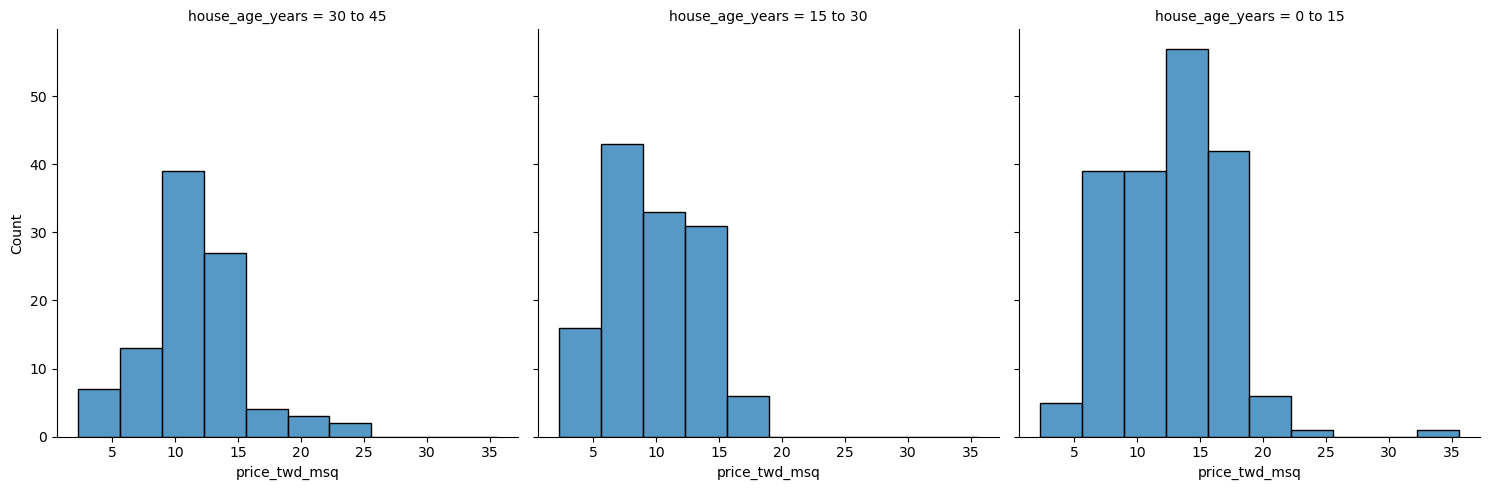

In [43]:
# Sometimes, independent variables may be categorical such as the 'house_age_years' column

# Visualizing each house age category using sns.displot()
sns.displot(
    data=taiwan_real_estate,
    x='price_twd_msq',
    col='house_age_years',
    bins=10
)

plt.show()

In [44]:
# Finding the mean price for each house age category
taiwan_real_estate.groupby('house_age_years')['price_twd_msq'].mean()

house_age_years
0 to 15     12.637471
15 to 30     9.876743
30 to 45    11.393264
Name: price_twd_msq, dtype: float64

In [45]:
mdl_price_vs_age = ols(
    'price_twd_msq ~ house_age_years',
    data=taiwan_real_estate
).fit()

# Notice that the '0 to 15' category becomes the reference group
# This method of parameterization is useful for multivariable linear
# regression. For simple linear regression, it is more ideal to have 
# each categorical independent variable their own regression line.

print(mdl_price_vs_age.params)

Intercept                      12.637471
house_age_years[T.15 to 30]    -2.760728
house_age_years[T.30 to 45]    -1.244207
dtype: float64


In [46]:
# Adding a '+ 0' in the formula omits the intercept/constant.
# This forces each group through the origin (which is now the reference group)
mdl_price_vs_age0 = ols(
    'price_twd_msq ~ house_age_years + 0',
    data=taiwan_real_estate
).fit()

print(mdl_price_vs_age0.params)

house_age_years[0 to 15]     12.637471
house_age_years[15 to 30]     9.876743
house_age_years[30 to 45]    11.393264
dtype: float64


### Making Predictions

We can create a dataframe out of the values we wish to use as independent variables. Below is a model setup for house prices vs. number of convenience stores in the taiwan real estate dataset

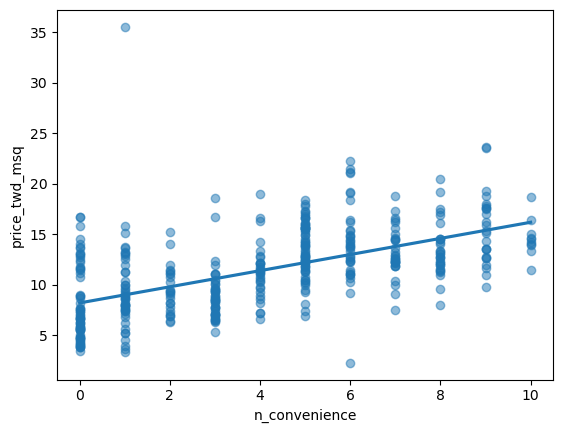

In [47]:
sns.regplot(
    x='n_convenience',
    y='price_twd_msq',
    data=taiwan_real_estate,
    ci=None,
    scatter_kws={'alpha':0.5}
)

plt.show()

In [48]:
mdl_price_vs_conv = ols('price_twd_msq ~ n_convenience', data=taiwan_real_estate).fit()

print(mdl_price_vs_conv.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64


In [49]:
# This is a dataframe of values to be substituted into the independent variable
# The response variable's value will be predicted accordingly

independent_data = pd.DataFrame({'n_convenience':np.arange(0,11)})
independent_data

,n_convenience
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [50]:
# This works but it is better to have the predicted values
# beside the corresponding input value

price_twd_msq = mdl_price_vs_conv.predict(independent_data)
price_twd_msq

0      8.224237
1      9.022317
2      9.820397
3     10.618477
4     11.416556
5     12.214636
6     13.012716
7     13.810795
8     14.608875
9     15.406955
10    16.205035
dtype: float64

In [51]:
# Using pd.Dataframe.assign() is better

df_predict = independent_data.assign(
    predicted_price=mdl_price_vs_conv.predict(independent_data['n_convenience'])
)

df_predict

,n_convenience,predicted_price
0,0,8.224237
1,1,9.022317
2,2,9.820397
3,3,10.618477
4,4,11.416556
5,5,12.214636
6,6,13.012716
7,7,13.810795
8,8,14.608875
9,9,15.406955


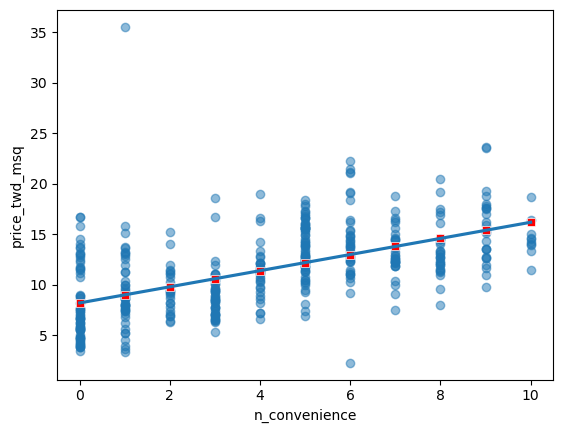

In [52]:
# Creating a figure object allows us to stack 
# multiple plots
fig = plt.figure()

sns.regplot(
    x='n_convenience',
    y='price_twd_msq',
    data=taiwan_real_estate,
    ci=None,
    scatter_kws={'alpha':0.5}
)

sns.scatterplot(
    x='n_convenience',
    y='predicted_price',
    data=df_predict,
    marker='s',
    color='r'
)

plt.show()

### Statsmodels LR Model Objects

In [53]:
# Models have more attributes other than '.params'

# '.fittedvalues' returns predictions using the original
# training data. Think of it as a shortcut for using predict()
# on the original data

print(mdl_price_vs_conv.fittedvalues)

0      16.205035
1      15.406955
2      12.214636
3      12.214636
4      12.214636
         ...    
409     8.224237
410    15.406955
411    13.810795
412    12.214636
413    15.406955
Length: 414, dtype: float64


In [54]:
# '.resid' returns the residuals of each data point
# Remember that residuals measure the inaccuracy of a model fit
print(mdl_price_vs_conv.resid)

0     -4.737561
1     -2.638422
2      2.097013
3      4.366302
4      0.826211
         ...   
409   -3.564631
410   -0.278362
411   -1.526378
412    3.670387
413    3.927387
Length: 414, dtype: float64


In [55]:
# Also note that residuals are simply 'actual response value - predicted response value'
print(taiwan_real_estate['price_twd_msq'] - mdl_price_vs_conv.fittedvalues)

0     -4.737561
1     -2.638422
2      2.097013
3      4.366302
4      0.826211
         ...   
409   -3.564631
410   -0.278362
411   -1.526378
412    3.670387
413    3.927387
Length: 414, dtype: float64


In [56]:
# You can print out a summary of a model by calling .summary() on it
mdl_price_vs_conv.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          price_twd_msq   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     199.3
Date:                Sun, 17 Aug 2025   Prob (F-statistic):           3.41e-37
Time:                        11:46:24   Log-Likelihood:                -1091.1
No. Observations:                 414   AIC:                             2186.
Df Residuals:                     412   BIC:                             2194.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.2242      0.285     28.857      0.000       7.664       8.784
n_convenience     0.7981      0.057     14.118      0.000       0.687       0.909
==============================================================================
Omnibus:                      171.927   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1417.242
Skew:                           1.553   Prob(JB):                    1.78e-308
Kurtosis:                      11.516   Cond. No.                         8.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Regression to the Mean

Regression to the mean is a statistical phenomenon where seemingly extreme values tend towards the mean of the dataset due to randomness.

Below is a dataset for S&P 500 whic contains investment performance and returns for the year 2018 and 2019. For example, an extremely low or high return may be a result of luck/randomness. Such an occurrence may not occur next time and will most likely tend towards the average.

In [57]:
sp500_yearly_returns = pd.read_csv('Data/sp500_yearly_returns.csv')

sp500_yearly_returns.head()

,symbol,return_2018,return_2019
0,AAPL,-0.053902,0.889578
1,MSFT,0.207953,0.575581
2,AMZN,0.284317,0.230278
3,FB,-0.257112,0.565718
4,GOOGL,-0.008012,0.281762


The plot below shows a red line (y = x) denoting perfect correlation between returns in 2018 and 2019. If there was no regression to the mean, we would see the datapoints clustered around the red line, indicating that well-performing returns from 2018 would continue to perform well in 2019. 

The blue line shows what actually happened (with regression to the mean). It shows that data from 2018 returns had almost no predicting power for returns in 2019. That is, the expected returns for 2019 were closer to the market average regardless of whether a certain stock had low or high returns in 2018.

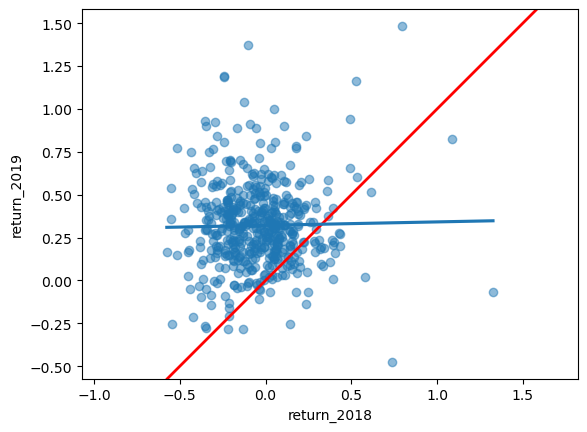

In [58]:
fig = plt.figure()

plt.axline(xy1=(1,1), slope=1, linewidth=2, color='red')
sns.regplot(
    x='return_2018',
    y='return_2019',
    data=sp500_yearly_returns,
    ci=None,
    scatter_kws={'alpha':0.5}
)

plt.axis('equal')

plt.show()

In [59]:
# Further demonstration using a model

mdl_returns = ols('return_2019 ~ return_2018', data=sp500_yearly_returns).fit()

print(mdl_returns.params)

Intercept      0.321321
return_2018    0.020069
dtype: float64


This further shows how results from 2018 do not necessarily predict future ones (for 2019 in this case). A return of -1 (loss) resulted in a higher return (win) value. A high return (e.g.: 1) resulted in a lower return in the following year.

In [60]:
predict_values = pd.DataFrame({'return_2018':[-1,0,1]})

df_predict = predict_values.assign(
    return_2019_predict=mdl_returns.predict(predict_values)
)

df_predict

,return_2018,return_2019_predict
0,-1,0.301251
1,0,0.321321
2,1,0.341390


### Transforming Variables

Sometimes, the relationship between the independent and dependent variable is not linear. Sometimes, it is needed to transform such variables in order to fit a linear regression model.

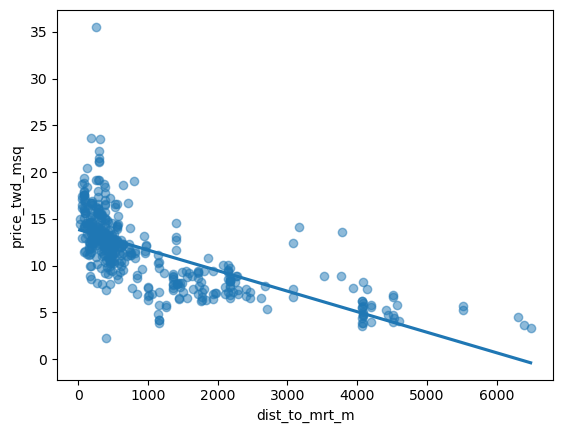

In [61]:
sns.regplot(
    x='dist_to_mrt_m',
    y='price_twd_msq',
    data=taiwan_real_estate,
    ci=None,
    scatter_kws={'alpha':0.5}
)

plt.show()

Notice the plot above. `dist_to_mrt_m` is plotted against `price_twd_msq` and it seems that the data is right-skewed. To fix this, we can apply a *Square Root Transformation*.

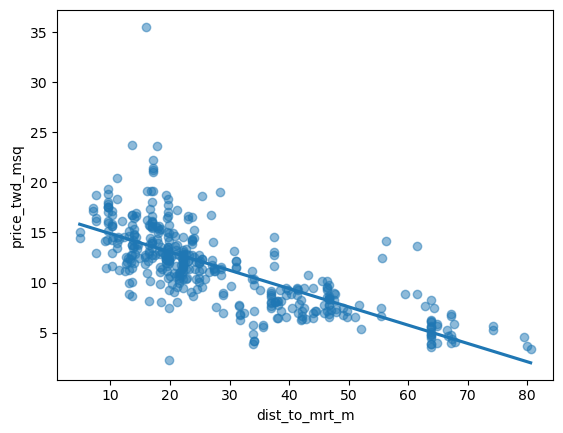

In [62]:
sns.regplot(
    x=np.sqrt(taiwan_real_estate['dist_to_mrt_m']),
    y='price_twd_msq',
    data=taiwan_real_estate,
    ci=None,
    scatter_kws={'alpha':0.5}
)

plt.show()

# Notice how the plot is tidier

Below is another example using the fish dataset. Suppose we want to fit a model to predict a Perch's weight/mass according to its length.

In [63]:
fish = pd.read_csv('Data/fish.csv')
fish.head()

,species,mass_g,length_cm
0,Bream,242.0,23.2
1,Bream,290.0,24.0
2,Bream,340.0,23.9
3,Bream,363.0,26.3
4,Bream,430.0,26.5


In [64]:
fish.species.unique()

array(['Bream', 'Roach', 'Perch', 'Pike'], dtype=object)

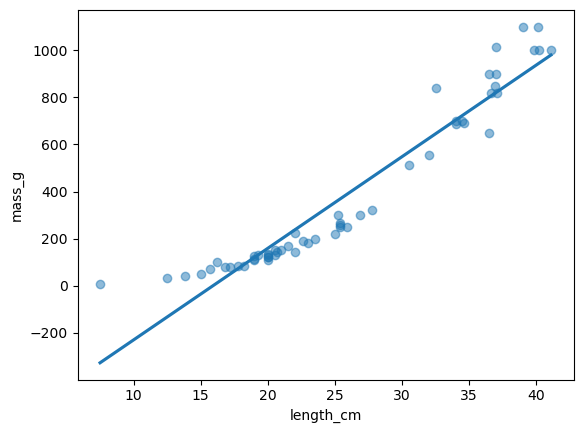

In [ ]:
# Created a copy of the fish dataset since we will be
# applying a transformation (in this case, adding a column)
perch = fish[fish['species'] == 'Perch'].copy()

sns.regplot(
    x='length_cm',
    y='mass_g',
    data=perch,
    ci=None,
    scatter_kws={'alpha':0.5}
)

plt.show()

We notice that the scatterplot does not show a linear relationship. It is very important to understand the given data first before applying statistical methods such as regression. 

Compared to other fish species, such as Breams which mostly grow longer, Perch's grow taller, wider, and longer. This means that their growth spans three dimensions. With this information, we can transform the independent variable (length) by cubing it in order to achieve a linear relationship.

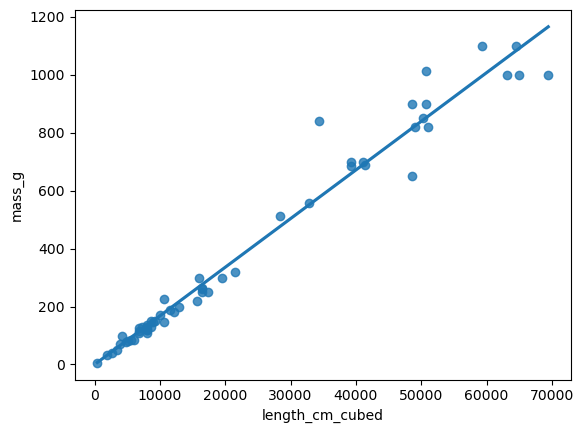

In [82]:
perch['length_cm_cubed'] = perch['length_cm'] ** 3

sns.regplot(
    x='length_cm_cubed',
    y='mass_g',
    data=perch,
    ci=None
)

plt.show()

In [83]:
# Model fitting
mdl_length_vs_mass = ols('mass_g ~ length_cm_cubed', data=fish).fit()
print(mdl_length_vs_mass.params)

Intercept          174.238542
length_cm_cubed      0.009102
dtype: float64


In [84]:
exp_data = pd.DataFrame(
    {
        'length_cm_cubed':np.arange(64000,64005)
    }
)

prediction_data = exp_data.assign(
    length_cm=fish['length_cm'],
    mass_g=mdl_length_vs_mass.predict(exp_data)
)   

prediction_data

,length_cm_cubed,length_cm,mass_g
0,64000,23.2,756.738209
1,64001,24.0,756.747310
2,64002,23.9,756.756412
3,64003,26.3,756.765514
4,64004,26.5,756.774615
